In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#  Why the return rate of DRESSES has increased in Spring/Summer 2020 (SS20) vs. Spring/Summer 2019 (SS19)?

This project is aiming to identify potential cause of increased return rate for dress between 2019 and 2020. As there's no explanation on dataset, certain assumptions are made as below.

## Assumptions:
> dimstyleoptionid: style of product <br>
> discount_rate: intepret it as discout per unit <br>
> retail price: unit price <br>
> each row is taken as one record (unique in combination of style + color + gender + brand + product_category + country + channel + season <br>
> return rate: return rate per unit, return rate = returned items/sold items

## Data quality check

In [2]:
# import dataset and check header
full_data = pd.read_csv('Dataset - return case.csv')
full_data.head(5)

,dimstyleoptionid,color,gender,brand,product_category,retail_price,country,channel,season,item_sold,item_returned,discount_rate
0,222262.0,PINK,Female,VM,T-SHIRTS & TOPS,20.0,AT,SBSF,SS19,4.0,2.0,0.0004
1,245516.0,BLUE,Female,VM,DRESSES,40.0,AT,SBSF,SS19,41.0,27.0,0.0023
2,262970.0,GREEN,Female,VM,T-SHIRTS & TOPS,40.0,AT,SBSF,SS19,8.0,3.0,0.0056
3,276086.0,RED,Female,VL,T-SHIRTS & TOPS,40.0,BE,SBSF,SS19,5.0,1.0,0.1399
4,282963.0,WHITE,Female,VM,T-SHIRTS & TOPS,40.0,BE,SBSF,SS19,1.0,0.0,0.0000


In [3]:
# check data type
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114250 entries, 0 to 114249
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   dimstyleoptionid  114246 non-null  float64
 1   color             114246 non-null  object 
 2   gender            114246 non-null  object 
 3   brand             114246 non-null  object 
 4   product_category  114247 non-null  object 
 5   retail_price      114246 non-null  float64
 6   country           114247 non-null  object 
 7   channel           114247 non-null  object 
 8   season            114246 non-null  object 
 9   item_sold         114246 non-null  float64
 10  item_returned     114246 non-null  float64
 11  discount_rate     114246 non-null  float64
dtypes: float64(5), object(7)
memory usage: 10.5+ MB


In [4]:
# check if null value
full_data.isnull().any()

dimstyleoptionid    True
color               True
gender              True
brand               True
product_category    True
retail_price        True
country             True
channel             True
season              True
item_sold           True
item_returned       True
discount_rate       True
dtype: bool

In [5]:
# drop null value
full_data.dropna(inplace = True)
full_data.isnull().any()

dimstyleoptionid    False
color               False
gender              False
brand               False
product_category    False
retail_price        False
country             False
channel             False
season              False
item_sold           False
item_returned       False
discount_rate       False
dtype: bool

In [6]:
# check if na data
full_data.isna().any()

dimstyleoptionid    False
color               False
gender              False
brand               False
product_category    False
retail_price        False
country             False
channel             False
season              False
item_sold           False
item_returned       False
discount_rate       False
dtype: bool

In [7]:
# check if duplicates
full_data.duplicated().any()

False

In [8]:
# desciptive full data
full_data.describe()

,dimstyleoptionid,retail_price,item_sold,item_returned,discount_rate
count,114240.000000,114240.000000,114240.000000,114240.000000,114240.000000
mean,299853.364181,40.133754,12.541675,9.595965,0.063344
std,33227.380519,14.932323,42.970645,740.251830,0.119527
min,19513.000000,20.000000,0.000000,0.000000,-0.002400
25%,274419.750000,40.000000,1.000000,0.000000,0.000100
50%,297600.000000,40.000000,3.000000,1.000000,0.004600
75%,327429.000000,40.000000,9.000000,4.000000,0.066700
max,377109.000000,260.000000,3837.000000,250000.000000,0.920000


In [9]:
# desciptive 2019 data
full_data[full_data['season']=='SS19'].describe()

,dimstyleoptionid,retail_price,item_sold,item_returned,discount_rate
count,56637.000000,56637.000000,56637.000000,56637.000000,56637.000000
mean,274331.468139,40.332292,11.638911,10.893091,0.059477
std,20271.857092,14.867013,40.915279,1050.799943,0.117266
min,19513.000000,20.000000,1.000000,0.000000,-0.000400
25%,267471.000000,40.000000,1.000000,0.000000,0.000100
50%,274688.000000,40.000000,3.000000,1.000000,0.003000
75%,284169.000000,40.000000,9.000000,4.000000,0.057300
max,331052.000000,260.000000,3837.000000,250000.000000,0.920000


In [10]:
# desciptive 2020 data
full_data[full_data['season']=='SS20'].describe()

,dimstyleoptionid,retail_price,item_sold,item_returned,discount_rate
count,57603.000000,57603.000000,57603.000000,57603.000000,57603.000000
mean,324947.259049,39.938545,13.429301,8.320591,0.067146
std,22702.325519,14.993826,44.882559,33.151164,0.121590
min,116759.000000,20.000000,0.000000,0.000000,-0.002400
25%,313530.000000,40.000000,0.000000,0.000000,0.000100
50%,326529.000000,40.000000,3.000000,1.000000,0.006700
75%,338458.000000,40.000000,10.000000,4.000000,0.070000
max,377109.000000,180.000000,2070.000000,1695.000000,0.852900


In [11]:
# on descriptive analysis, seem to be a data entry issue, let's clean it
outliers = full_data[full_data['item_returned']==250000]
full_data.drop(outliers.index, axis=0, inplace = True)

In [12]:
# it's also a bit weird to have minus discount rate, let's take a look of how many records it impacts
full_data[full_data['discount_rate']<0]['season'].value_counts()
# probably not a mistake, must be special meaning but no explanation

SS19    4544
SS20    4096
Name: season, dtype: int64

In [13]:
# gender column check
female_portion = full_data['gender'].value_counts()[0]/full_data['gender'].count()
print('female is {:.4f} of total records'.format(female_portion))

female is 1.0000 of total records


In [14]:
# to investigate return rate, first do some feature engineering to have this index
full_data['return_rate'] = full_data['item_returned']/full_data['item_sold']
full_data.head()

,dimstyleoptionid,color,gender,brand,product_category,retail_price,country,channel,season,item_sold,item_returned,discount_rate,return_rate
0,222262.0,PINK,Female,VM,T-SHIRTS & TOPS,20.0,AT,SBSF,SS19,4.0,2.0,0.0004,0.500000
1,245516.0,BLUE,Female,VM,DRESSES,40.0,AT,SBSF,SS19,41.0,27.0,0.0023,0.658537
2,262970.0,GREEN,Female,VM,T-SHIRTS & TOPS,40.0,AT,SBSF,SS19,8.0,3.0,0.0056,0.375000
3,276086.0,RED,Female,VL,T-SHIRTS & TOPS,40.0,BE,SBSF,SS19,5.0,1.0,0.1399,0.200000
4,282963.0,WHITE,Female,VM,T-SHIRTS & TOPS,40.0,BE,SBSF,SS19,1.0,0.0,0.0000,0.000000


In [15]:
# descriptive after cleaning
full_data.describe()
# new feature has values > 1, must be over returned compared with sold items, could impact on data

,dimstyleoptionid,retail_price,item_sold,item_returned,discount_rate,return_rate
count,114239.000000,114239.000000,114239.000000,114239.000000,114239.000000,99331.000000
mean,299853.747774,40.133755,12.540034,7.407654,0.063343,0.446928
std,33227.272997,14.932388,42.967254,30.188803,0.119527,0.365495
min,19513.000000,20.000000,0.000000,0.000000,-0.002400,0.000000
25%,274421.000000,40.000000,1.000000,0.000000,0.000100,0.000000
50%,297600.000000,40.000000,3.000000,1.000000,0.004600,0.466667
75%,327429.000000,40.000000,9.000000,4.000000,0.066700,0.750000
max,377109.000000,260.000000,3837.000000,2586.000000,0.920000,1.500000


In [16]:
# this dataset also has records with returned items more than sold items, which is a bit weird too
full_data[full_data['item_returned']>full_data['item_sold']]['season'].value_counts()

SS20    963
Name: season, dtype: int64

> **Findings:** <br>
>> Outlier (250000) in item_returned 2019 is identified as data entry error. <br>
>> 8640 records with negative discount rate (4544 in 2019, 4096 in 2020). <br>
>> 964 records (1 in 2019, 963 in 2020) with item_returned more than sold. <br>
>> Increased average sales in 2020 compared with 2019. <br>
>> Key index return rate is not in dataset, needs to be created.

# Exploratory Analysis

## Distribution of returned, sold items and return rate per record

C:\Users\xjuan\Anaconda3\envs\myenv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\xjuan\Anaconda3\envs\myenv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\xjuan\Anaconda3\envs\myenv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

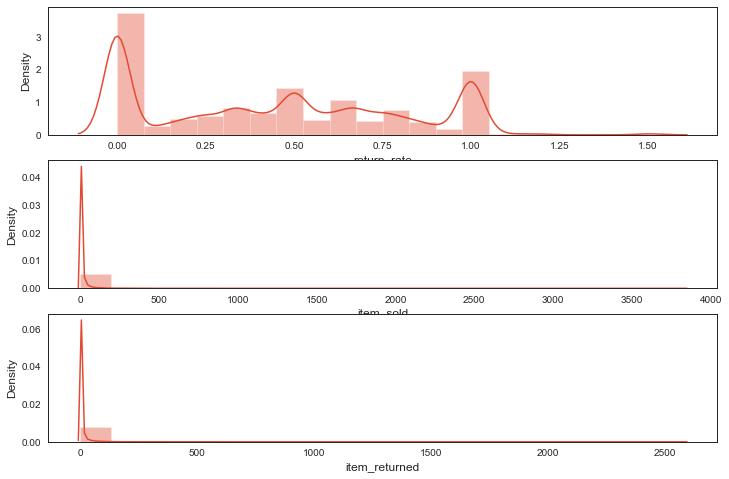

In [17]:
plt.style.use('ggplot')
sns.set_style('white')
plt.figure(figsize=(12,8))
plt.subplot(3,1,1)
sns.distplot(full_data['return_rate'], bins=20)
plt.subplot(3,1,2)
sns.distplot(full_data['item_sold'], bins=20)
plt.subplot(3,1,3)
sns.distplot(full_data['item_returned'], bins=20)

> **Findings:** <br>
>> Average return rate is high in 0 and 1, then 0.5, 0.65, 0.8 <br>
>> Most of records for sold items is 0 - 200 items per records, but also extreme values <br>
>> Returned item has the same trend as sold item <br>

# Trend Analysis <br>
## 1. Relationship between sold items and returned items 2019 vs. 2020

> As we want to dig into increased return rate of dress, probably we need to take a look of the trend of all products, probably it's a common rule.

In [21]:
# return rate
def main_plot(df):
    all_by_season = df.groupby(['season'], as_index=False)[['item_sold','item_returned']].sum()
    return_rate_season = all_by_season['item_returned']/all_by_season['item_sold']
    # visualize
    ax = all_by_season.plot(kind='bar', figsize=(8,6))
    ax.legend(loc=2)
    plt.xticks([0,1],labels=['2019','2020'])
    plt.xticks(rotation=0)
    plt.xlabel('season')
    plt.ylabel('number of items')
    plt.title('Number of items sold/returned per season')
    ax2 = ax.twinx()

    line, = ax2.plot([0,1],return_rate_season,'g',lw=5, alpha=0.5,label='return_rate')
    ax2.set_ylim(0,1)
    ax2.set_ylabel('return rate')
    plt.legend(loc=1)
# YoY rate
    all_by_season['sold_YoY']= all_by_season['item_sold'].pct_change(periods=1)
    all_by_season['returned_YoY']= all_by_season['item_returned'].pct_change(periods=1)
    main_table = pd.DataFrame(all_by_season)
    return main_table

,season,item_sold,item_returned,sold_YoY,returned_YoY
0,SS19,658993.0,366952.0,NaN,NaN
1,SS20,773568.0,479291.0,0.173864,0.306141


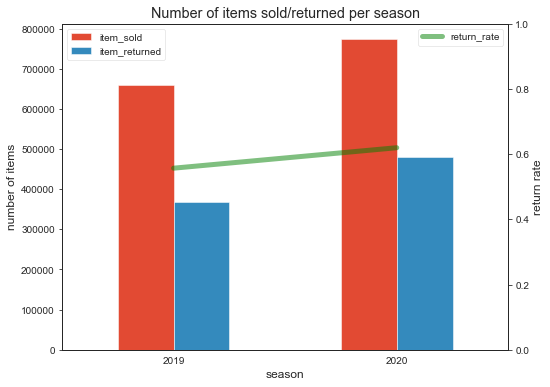

In [22]:
main_plot(full_data)

>**Findings:** <br>
>> Number of sold items is associated with number of returned items, but 1 unit of sales increase could imply more than 1 unit of returned items.

Text(0.5, 1, 'Correlation index between item sold and item returned')

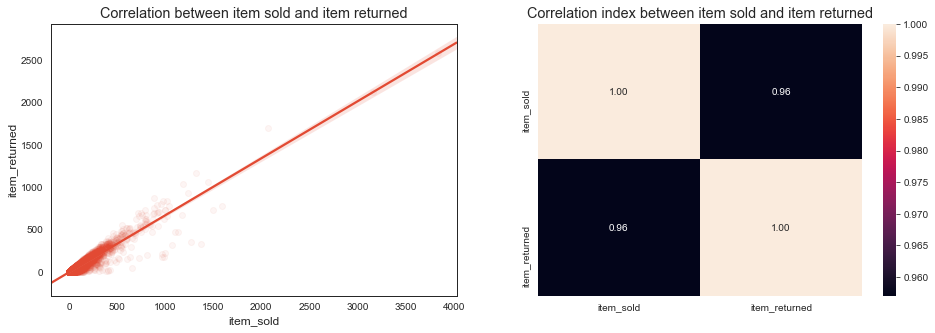

In [23]:
# relationship plot
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.regplot(data=full_data, x='item_sold', y='item_returned',truncate=False, x_jitter=0.3, scatter_kws = {'alpha':1/20})
plt.title('Correlation between item sold and item returned')

plt.subplot(1,2,2)
sns.heatmap(full_data[['item_sold','item_returned']].corr(), annot=True, fmt='.2f',)
plt.title('Correlation index between item sold and item returned')

>**Finding:** <br>
>>Clearly, based on plots above, number of sold items and returned items are positively correlated, therefore increasing sales also imply higer return items. <br>
>>Let's look at dress specifically.

,season,item_sold,item_returned,sold_YoY,returned_YoY
0,SS19,251714.0,158578.0,NaN,NaN
1,SS20,313092.0,213639.0,0.24384,0.347217


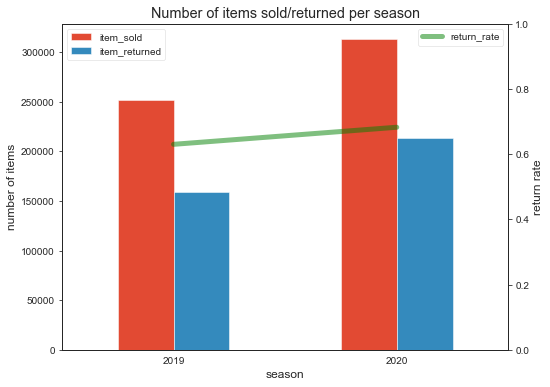

In [24]:
# dress plot
dress = full_data[full_data['product_category']=='DRESSES']
main_plot(dress)

Text(0, 0.5, 'item_returned')

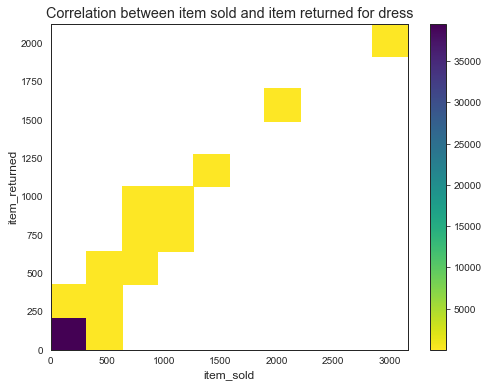

In [25]:
plt.figure(figsize=(8,6))
plt.hist2d(data=dress, x ='item_sold', y='item_returned', cmin=0.5, cmap='viridis_r')
plt.colorbar()
plt.title('Correlation between item sold and item returned for dress')
plt.xlabel('item_sold')
plt.ylabel('item_returned')

>**Finding:** <br>
>>The same rule also applies to dress.

# Factor Analysis
## 1. All categorical factors vs. return rate of dress <br>
> Here we would like to identify which categorical factor and their combination has closer relationship with increased return rate of dress.

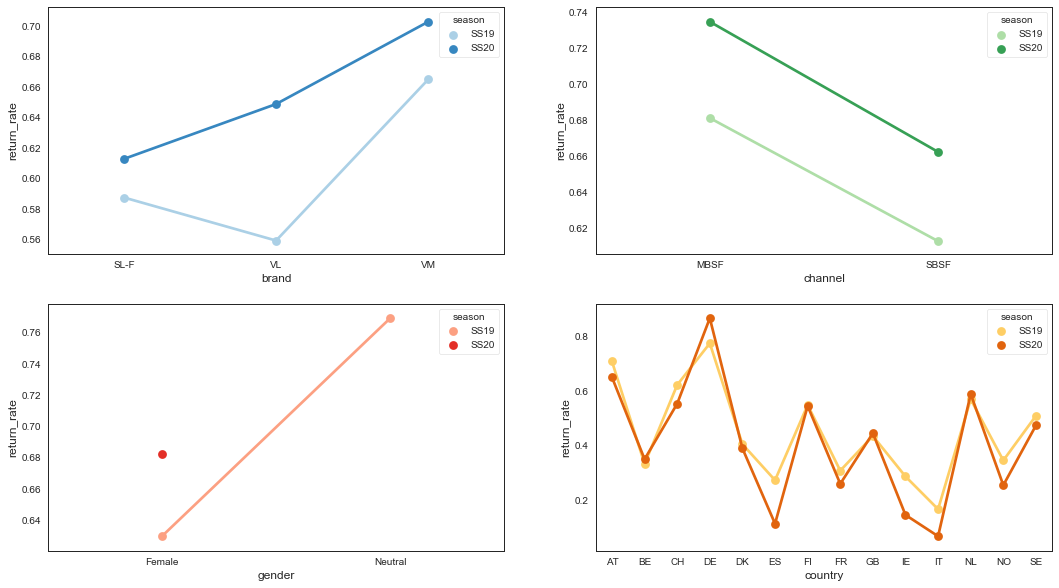

In [26]:
def by_data(col):
    df = dress.groupby(['season',col], as_index=False)[['item_sold','item_returned']].sum()
    df['return_rate'] = df['item_returned'] / df['item_sold']
    return df

brand = by_data('brand')
channel = by_data('channel')
gender = by_data('gender')
country = by_data('country')
color = by_data('color')
style = by_data('dimstyleoptionid')

fig, ax = plt.subplots(nrows=2, ncols=2 ,figsize = [18,10])

sns.pointplot(data = brand, x = 'brand', y='return_rate',hue='season',linestyles = '-',palette = 'Blues', ax = ax[0,0])
sns.pointplot(data = channel, x = 'channel', y='return_rate',hue='season',linestyles = '-',palette = 'Greens', ax = ax[0,1])
sns.pointplot(data = gender, x = 'gender', y='return_rate',hue='season',linestyles = '-',palette = 'Reds', ax = ax[1,0])
sns.pointplot(data = country, x = 'country', y='return_rate',hue='season',linestyles = '-',palette = 'YlOrBr', ax = ax[1,1])

>**Findings:** <br>
>> We could see in brand VL has a big jump in return rate as well as DE in country. <br>
>> Channel's relationship is pretty parellel. <br>
>> Gender is almost single value so nothing to do with it.

Text(0.5, 1.0, 'Dress return rate per season per color')

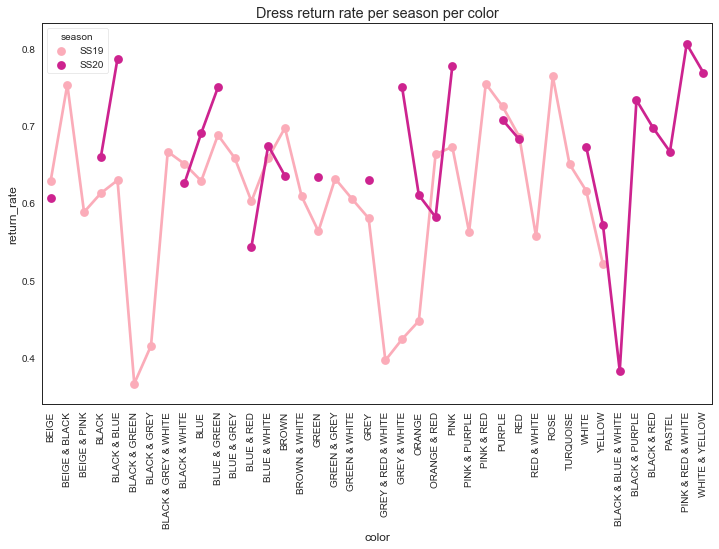

In [27]:
# check on color's impact
plt.figure(figsize=[12,7])
sns.pointplot(data = color, x = 'color', y='return_rate',hue='season',linestyles = '-', palette = 'RdPu')
plt.xticks(rotation=90)
plt.title('Dress return rate per season per color')

In [28]:
# check on style's impact
ss19 = dress[dress['season']=='SS19']
ss20 = dress[dress['season']=='SS20']

style_overlapping = ss19['dimstyleoptionid'].isin(ss20['dimstyleoptionid']).sum()/ss19['dimstyleoptionid'].count()
print('Only {:.1f} % still exists in 2020'.format(style_overlapping*100))

Only 15.7 % still exists in 2020


>**Findings:** <br>
>> Color differs per style, not all color exists in 2020, so not comparable. <br>
>> Same with color, only 15.7% still exists in 2020, so not comparable too.

In [29]:
# As we identified, VL jumps a lot in returning rate, so let's take a look of VL's impact on total sales
def portion_cal(df, col):
    by_ = df.groupby(['season',col])['item_sold'].sum().rename("count")
    col_perc = by_ / by_.groupby(level=0).sum()
    return col_perc

In [30]:
brand_perc = portion_cal(brand,'brand')

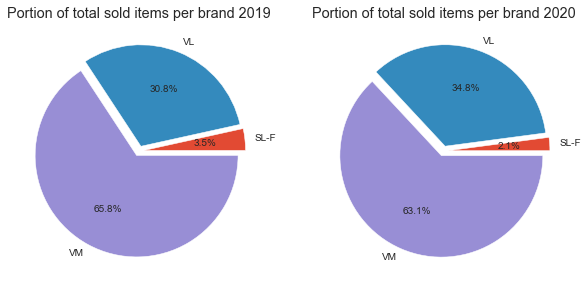

In [31]:
def pie_plot(df, name):
    i = len(df.loc['SS19'])
    fig, ax =plt.subplots(nrows=1, ncols=2, figsize = [10,8])

    ax[0].pie(df.loc['SS19'], autopct="%.1f%%", explode=[0.05]*i, labels= df.loc['SS19'][:].index)
    ax[0].set_title('Portion of total sold items per {:s} 2019'.format(name))
    ax[1].pie(df.loc['SS20'], autopct="%.1f%%", explode=[0.05]*i, labels = df.loc['SS19'][:].index)
    ax[1].set_title('Portion of total sold items per {:s} 2020'.format(name))
    
pie_plot(brand_perc, 'brand')

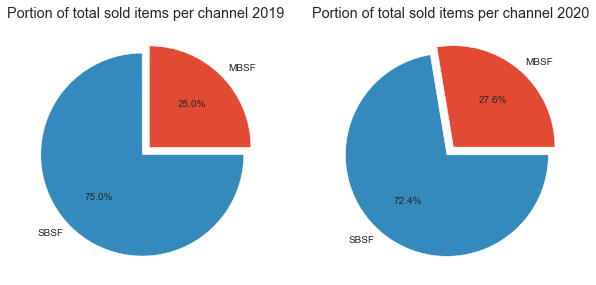

In [32]:
# channel's power on total
channel_perc = portion_cal(channel,'channel')
pie_plot(channel_perc, 'channel')

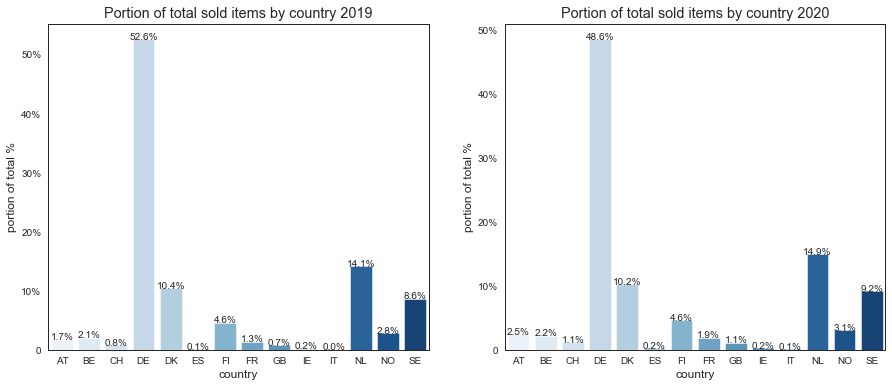

In [33]:
# country's power on total
country_1= country.groupby(['season','country'])['item_sold'].sum().rename("perc")
country_perc = country_1 / country_1.groupby(level=0).sum()
country_perc = country_perc.reset_index()

season = country_perc['season'].value_counts(ascending=True).index
plt.figure(figsize=(15,6))
labels= [2019, 2020]
for i in np.arange(0,2):
    plt.subplot(1,2,i+1)
    ss = country_perc[country_perc['season']==season[i]]
    sns.barplot(data=ss,x='country',y='perc',palette='Blues')
    plt.title('Portion of total sold items by country {}'.format(labels[i]))
    plt.ylabel('portion of total %')
    for a in range(ss.shape[0]):
        perc = ss['perc'].iloc[a]
        plt.text(a, perc, '{:.1f}%'.format(perc*100),ha='center')
        plt.yticks(ticks=[0,0.1,0.2,0.3,0.4,0.5],labels=['0','10%','20%','30%','40%','50%'])

Text(0, 0.5, 'return rate')

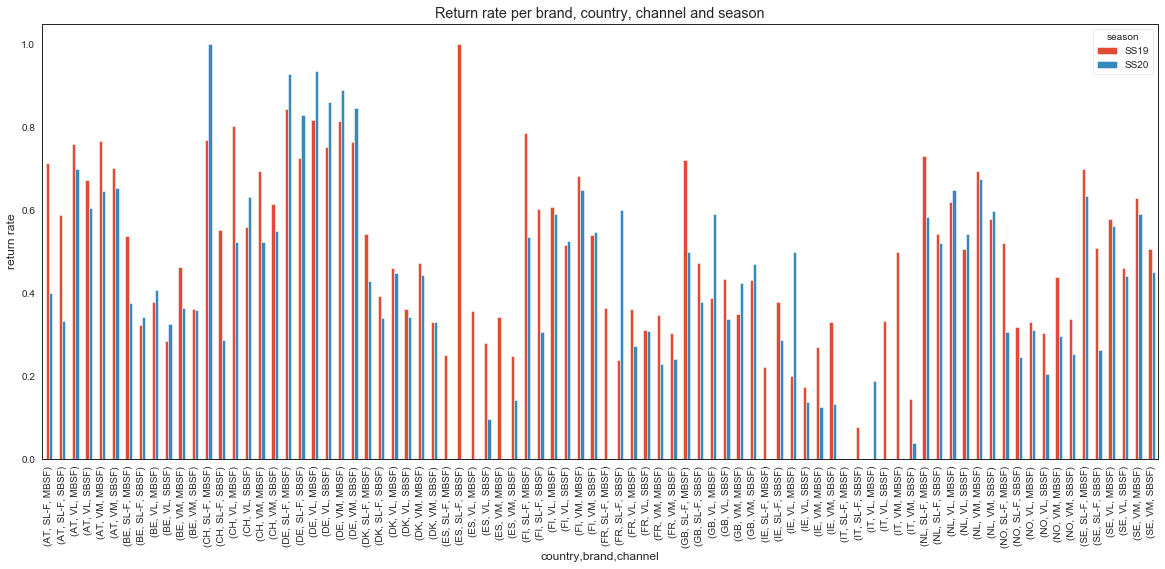

In [34]:
# combination of all three factors
by_bc = dress.groupby(['country','brand','channel','season'])[['item_sold','item_returned']].sum()
by_bc['ra'] = by_bc['item_returned']/by_bc['item_sold']
by_bc['ra'].unstack().plot(kind='bar',figsize=(20,8))
plt.title('Return rate per brand, country, channel and season')
plt.ylabel('return rate')

>**Findings:** <br>
>> The biggest increase in return rate falls in DE all brands, both channels. <br>
>> There are other countries with increased return rate in 2020, but their sales are relatively small.

## 2. Discount rate vs. return rate of DE dress

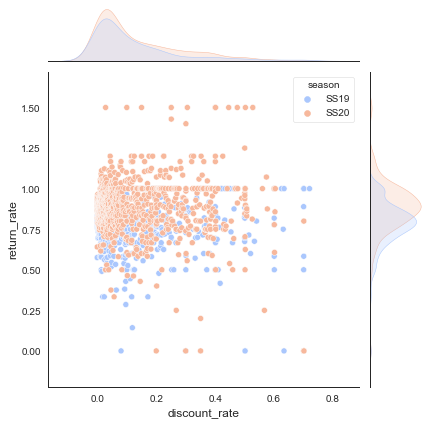

In [35]:
de = dress[dress['country']=='DE']
by_discount = de.groupby(['season','discount_rate'], as_index=False)[['item_sold','item_returned']].sum()
by_discount['return_rate'] = by_discount['item_returned']/by_discount['item_sold']
sns.jointplot(data=by_discount, x='discount_rate',y='return_rate',hue='season',palette='coolwarm')

>**Findings:** <br>
>> Looking at DE specifically, we do see return rate is higher on average in 2020. <br>
>> In terms of discount rate, peak for both is around 0.1, but compared with 2019, there are more items with bigger discount. <br>
>> No significant relationship between discount rate and return rate.

In [36]:
# what if cut discount into categorical variable
bins_edge = [-1, 0, 0.2, 0.4, 0.6, 0.8,1]
bins_cat = ['no discount','0-0.2','0.2-0.4','0.4-0.6','0.6-0.8','0.8-1']
by_discount['discount_cat'] = pd.cut(by_discount['discount_rate'],bins_edge,labels=bins_cat)
by_discount.head()

,season,discount_rate,item_sold,item_returned,return_rate,discount_cat
0,SS19,-0.0002,73.0,42.0,0.575342,no discount
1,SS19,-0.0001,1992.0,1609.0,0.807731,no discount
2,SS19,0.0000,3057.0,2544.0,0.832188,no discount
3,SS19,0.0001,2075.0,1684.0,0.811566,0-0.2
4,SS19,0.0002,1445.0,1176.0,0.813841,0-0.2


count      mean       std       max
season discount_cat                                     
SS19   no discount     3.0  0.738421  0.141758  0.832188
       0-0.2         545.0  0.778608  0.128956  1.000000
       0.2-0.4        92.0  0.794508  0.162666  1.000000
       0.4-0.6        36.0  0.741681  0.243459  1.000000
       0.6-0.8        17.0  0.729501  0.331721  1.000000
SS20   no discount     3.0  0.814019  0.151512  0.920883
       0-0.2         630.0  0.887037  0.130875  1.500000
       0.2-0.4       178.0  0.879761  0.215375  1.500000
       0.4-0.6        51.0  0.937277  0.281020  1.500000
       0.6-0.8        10.0  0.604206  0.434307  1.000000

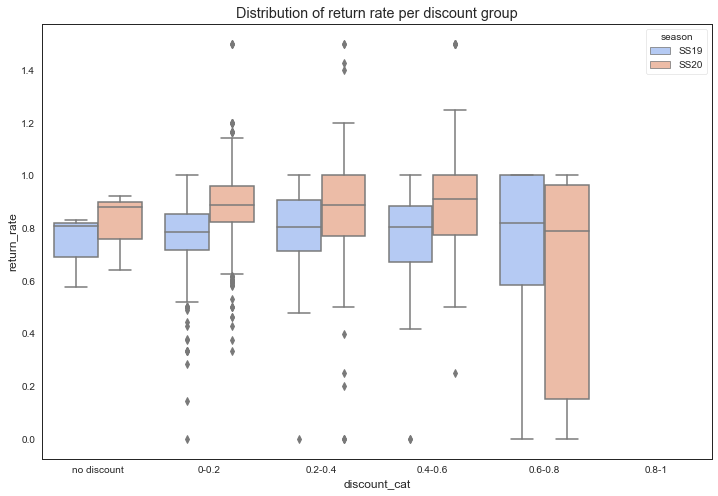

In [37]:
# visualize
plt.figure(figsize=(12,8))
sns.boxplot(x='discount_cat',y='return_rate',data=by_discount,hue='season',palette='coolwarm')
plt.title('Distribution of return rate per discount group')
by_discount.groupby(['season','discount_cat'])['return_rate'].describe()[['count','mean','std','max']]

>**Findings:**<br>
>> With higher discount rate, return rate turns to have a bigger range, implying return behaviour is less predictable. <br>
>> 2020 has extreme values in return rate (150%), as mentioned before.


## 3. Retail price vs. return rate of DE dress

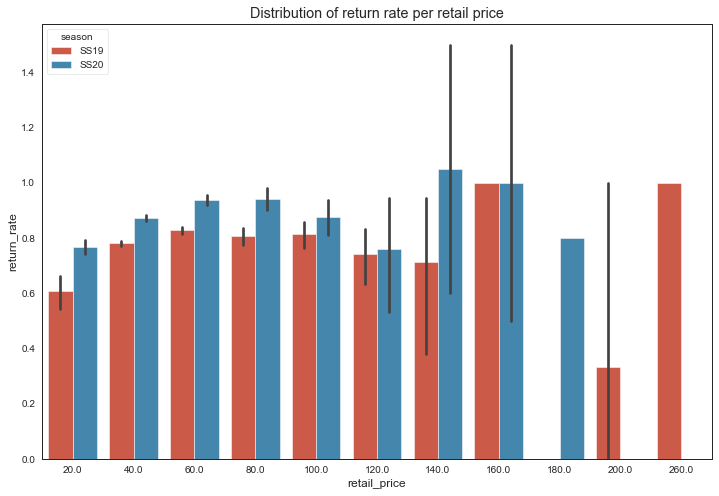

In [38]:
de = dress[dress['country']=='DE']
by_price = de.groupby(['season','retail_price'], as_index=False)[['item_sold','item_returned']].sum()
by_price['return_rate'] = by_price['item_returned']/by_discount['item_sold']
plt.figure(figsize=(12,8))
plt.title('Distribution of return rate per retail price')
sns.barplot(data=de, x='retail_price',y='return_rate',hue='season')

>**Findings:**<br>
>> With higher retail price, return rate turns to have a bigger range, implying return behaviour is less predictable. <br>
>> From price 20 - 80, DE dress has a bigger return rate in 2020.


# Over returned items vs. return rate of dress <br>
## 1. Impact of over returned items

In [39]:
over_returned = dress[dress['item_sold']-dress['item_returned']<0]

In [40]:
print(over_returned['country'].value_counts())
print(over_returned['brand'].value_counts())
print(over_returned['channel'].value_counts())

DE    516
Name: country, dtype: int64
VL      246
VM      195
SL-F     75
Name: brand, dtype: int64
MBSF    315
SBSF    201
Name: channel, dtype: int64


>**Findings:**<br>
>> Overreturned records happen to have the biggest impact as we previously recognized scope, which is DE, VL. <br>

## 2. What if we take out the impact of overreturend items, set all of them to max. number of sold items?

In [41]:
# set new data set
new = dress[dress['item_sold']-dress['item_returned']<0]
new['item_returned'] = new['item_sold']
new.count()

<ipython-input-41-2ac8404a0dae>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['item_returned'] = new['item_sold']


dimstyleoptionid    516
color               516
gender              516
brand               516
product_category    516
retail_price        516
country             516
channel             516
season              516
item_sold           516
item_returned       516
discount_rate       516
return_rate         516
dtype: int64

In [42]:
dress.count()

dimstyleoptionid    39733
color               39733
gender              39733
brand               39733
product_category    39733
retail_price        39733
country             39733
channel             39733
season              39733
item_sold           39733
item_returned       39733
discount_rate       39733
return_rate         34820
dtype: int64

In [43]:
dress.drop(new.index, axis=0,inplace=True)

C:\Users\xjuan\Anaconda3\envs\myenv\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [44]:
new_dress = dress.append(new)
new_dress.count()

dimstyleoptionid    39733
color               39733
gender              39733
brand               39733
product_category    39733
retail_price        39733
country             39733
channel             39733
season              39733
item_sold           39733
item_returned       39733
discount_rate       39733
return_rate         34820
dtype: int64

In [45]:
# check new dataset
new_dress.head()

,dimstyleoptionid,color,gender,brand,product_category,retail_price,country,channel,season,item_sold,item_returned,discount_rate,return_rate
1,245516.0,BLUE,Female,VM,DRESSES,40.0,AT,SBSF,SS19,41.0,27.0,0.0023,0.658537
5,243602.0,GREY,Female,VL,DRESSES,40.0,BE,SBSF,SS19,1.0,0.0,0.0002,0.000000
13,262053.0,BLACK,Female,VL,DRESSES,40.0,DE,SBSF,SS19,129.0,97.0,0.0018,0.751938
16,267533.0,BLACK,Female,VL,DRESSES,40.0,DE,SBSF,SS19,13.0,7.0,0.0327,0.538462
28,250525.0,GREY,Female,VM,DRESSES,60.0,DE,SBSF,SS19,3.0,2.0,0.2003,0.666667


,season,item_sold,item_returned,sold_YoY,returned_YoY
0,SS19,251714.0,158578.0,NaN,NaN
1,SS20,313092.0,212710.0,0.24384,0.341359


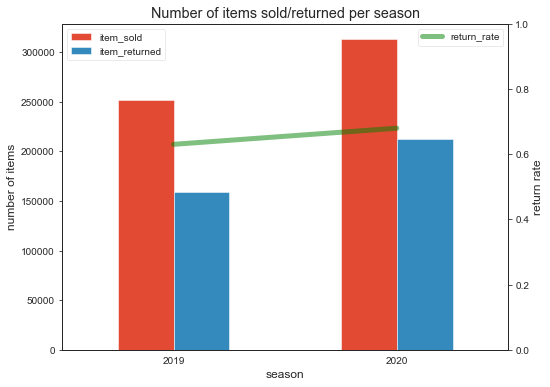

In [46]:
# new dataset visualize
main_plot(new_dress)

>**Findings:**
>> Compared with previous dataset, it's not a big impact, but worthy of some attention.

# Appendix

>Only for exploratory analysis

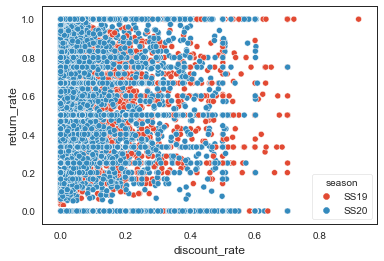

In [47]:
# exploratory scatter of average discount rate and return rate per records
sns.scatterplot(data=dress, x='discount_rate', y='return_rate',hue='season')

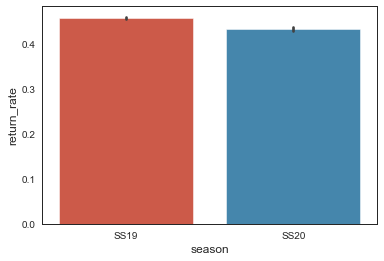

In [48]:
# avg. return rate per record drop from 2019 to 2020
sns.barplot(data=full_data,x='season',y='return_rate')
# get back to return rate per item

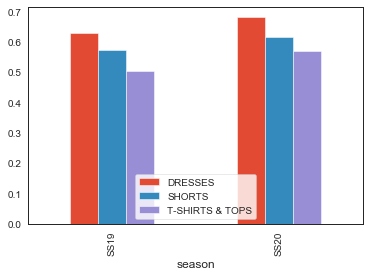

In [49]:
# all product category return rate per item trend
by_product = full_data.groupby(['season','product_category'])[['item_sold','item_returned']].sum()
by_product['return_rate'] = by_product['item_returned']/by_product['item_sold']

by_product['return_rate'].unstack().plot(kind='bar')
plt.legend(loc=8)

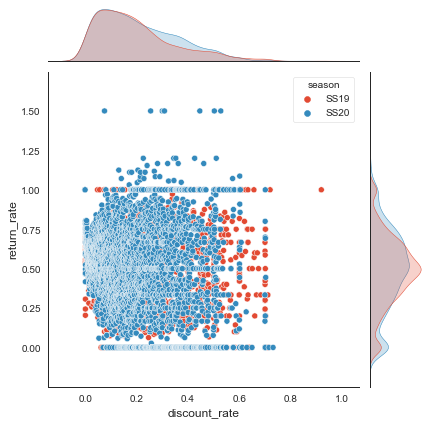

In [50]:
# full data discount rate and return rate
by_dis = full_data.groupby(['season','discount_rate'],as_index=False)[['item_sold','item_returned']].sum()
by_dis['return_rate'] = by_dis['item_returned']/by_dis['item_sold']

sns.jointplot(data=by_dis,x='discount_rate',y='return_rate',hue='season')

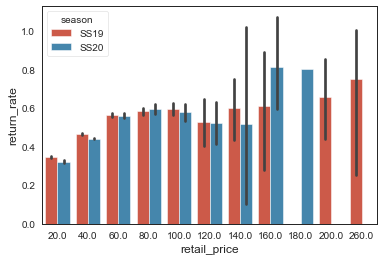

In [51]:
# full data retail price and return rate
sns.barplot(data=full_data, x='retail_price',y='return_rate',hue='season')